### How to Train YOLOv8 Object Detection on a Custom Dataset


In [1]:
!nvidia-smi

Wed May  3 01:07:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:17:00.0 Off |                  N/A |
|  0%   46C    P0    76W / 250W |      4MiB / 11178MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:65:00.0  On |                  N/A |
|  0%   

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/hy/Jacky/yolo-v8


## Install YOLOv8

Install YOLOv8 in two ways - from the source and via pip. We will use pip here.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-1.12.0+cu102 CUDA:0 (GeForce GTX 1080 Ti, 11178MiB)
Setup complete ✅ (20 CPUs, 62.6 GB RAM, 36.0/91.5 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

We can initialize YOLOv8 using CLI or python SDK. In this example, I use CLI. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

## Preparing a custom dataset

We use RoboFlow to create custom datasets by following the steps below. 

### Step 1: Creating project in RoboFlow

### Step 2: Uploading images

We then add the data to the newly created project. We can drag and drop a directory with a dataset in RoboFlow dashboard.

### Step 3: Labeling

If there has only images, we can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can generate a "dataset version". When generating a "Version", we may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v8` dataset format.

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --q

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR OWN API")
project = rf.workspace("WORKSPACE_NAME").project("PROJECT_NAME")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/home/hy/Jacky/yolo-v8/datasets’: File exists
/home/hy/Jacky/yolo-v8/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Football-Players-Detection-2-1 in yolov8:: 100%|██████████| 1286/1286 [00:00<00:00, 9377.86it/s]


## Start Training!

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml batch=12 epochs=200 imgsz=800 plots=True

/home/hy/Jacky/yolo-v8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-1.12.0+cu102 CUDA:0 (GeForce GTX 1080 Ti, 11178MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/home/hy/Jacky/yolo-v8/datasets/Football-Players-Detection-2-1/data.yaml, epochs=200, patience=50, batch=12, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

### Visualize Confusion Matrix

/home/hy/Jacky/yolo-v8


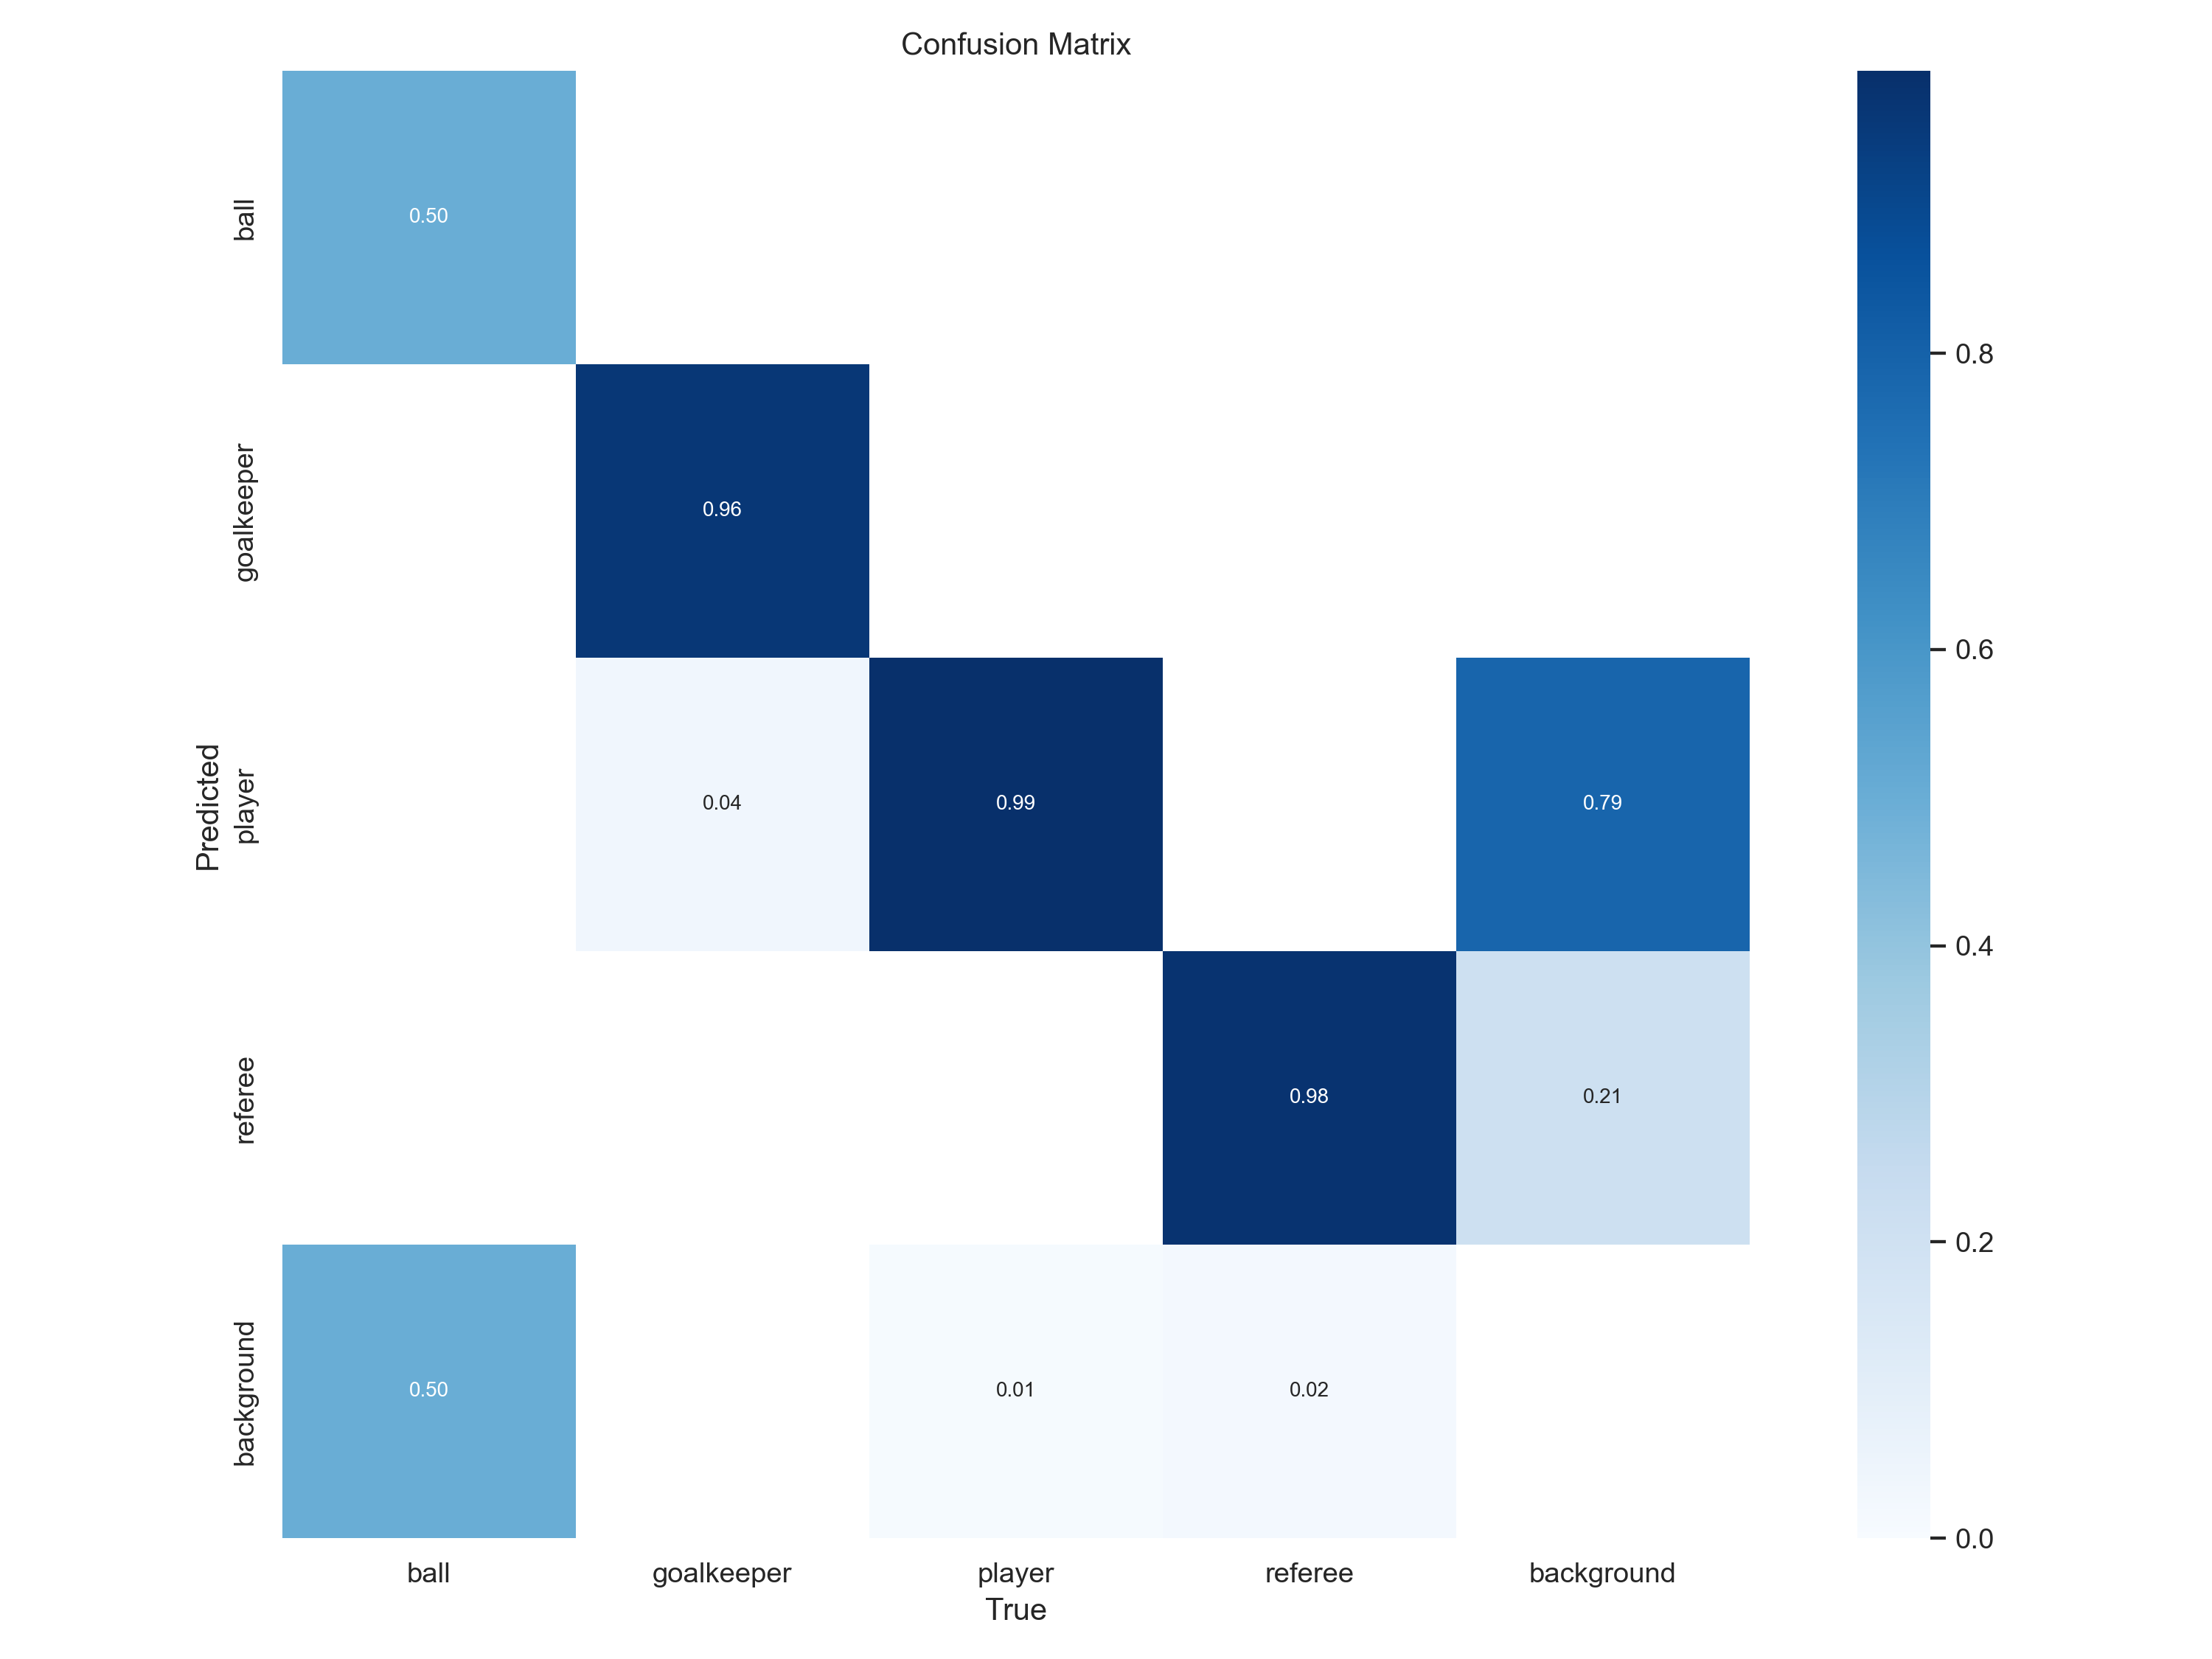

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/home/hy/Jacky/yolo-v8


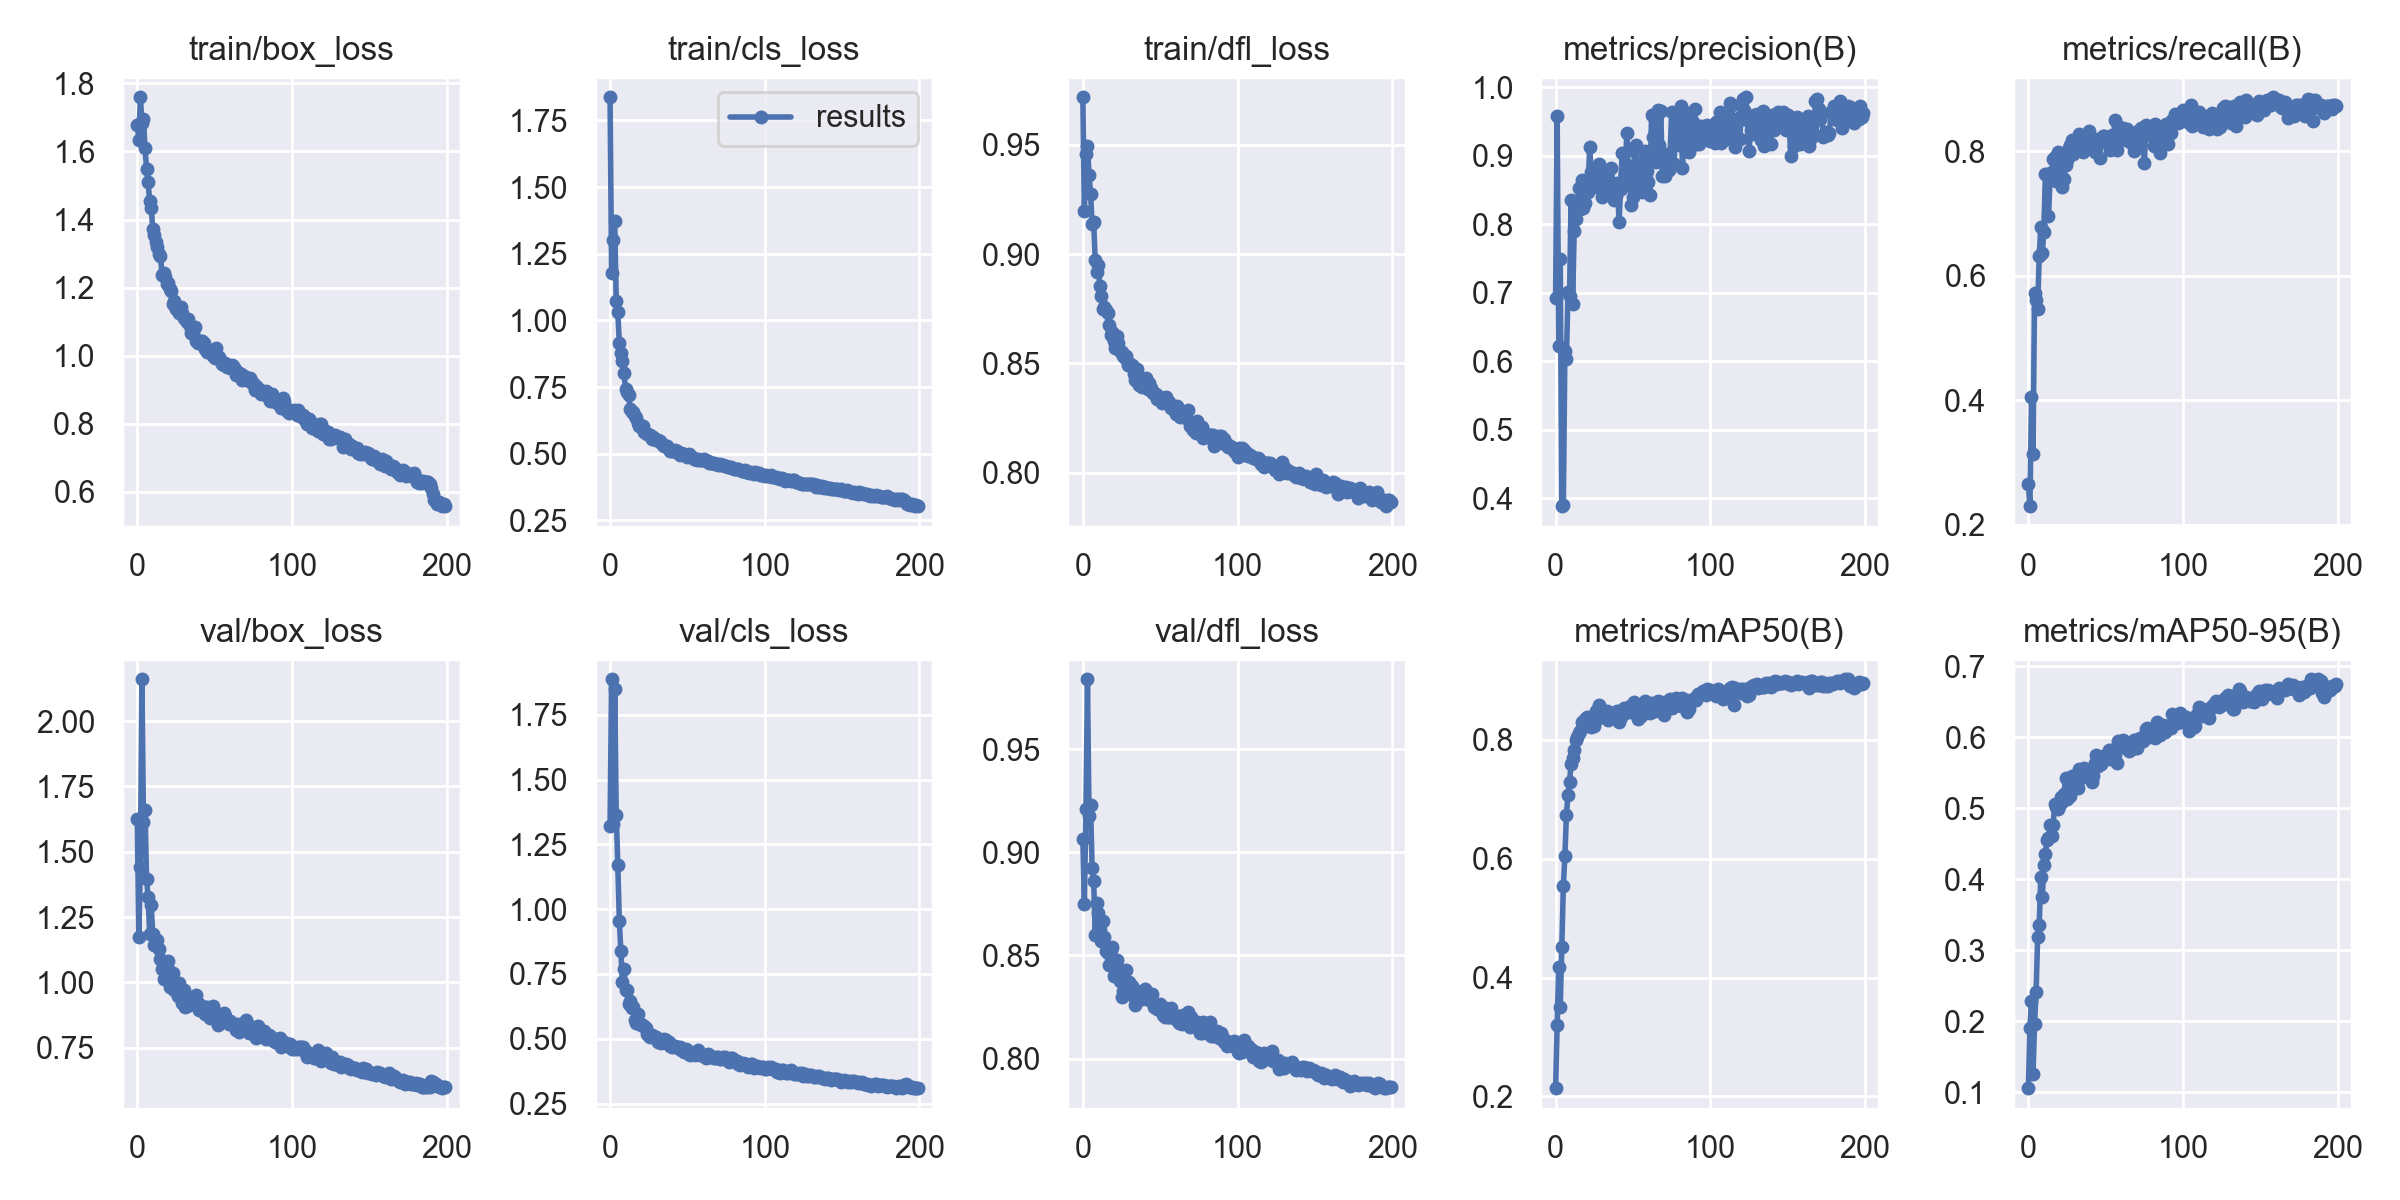

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=900)

/home/hy/Jacky/yolo-v8


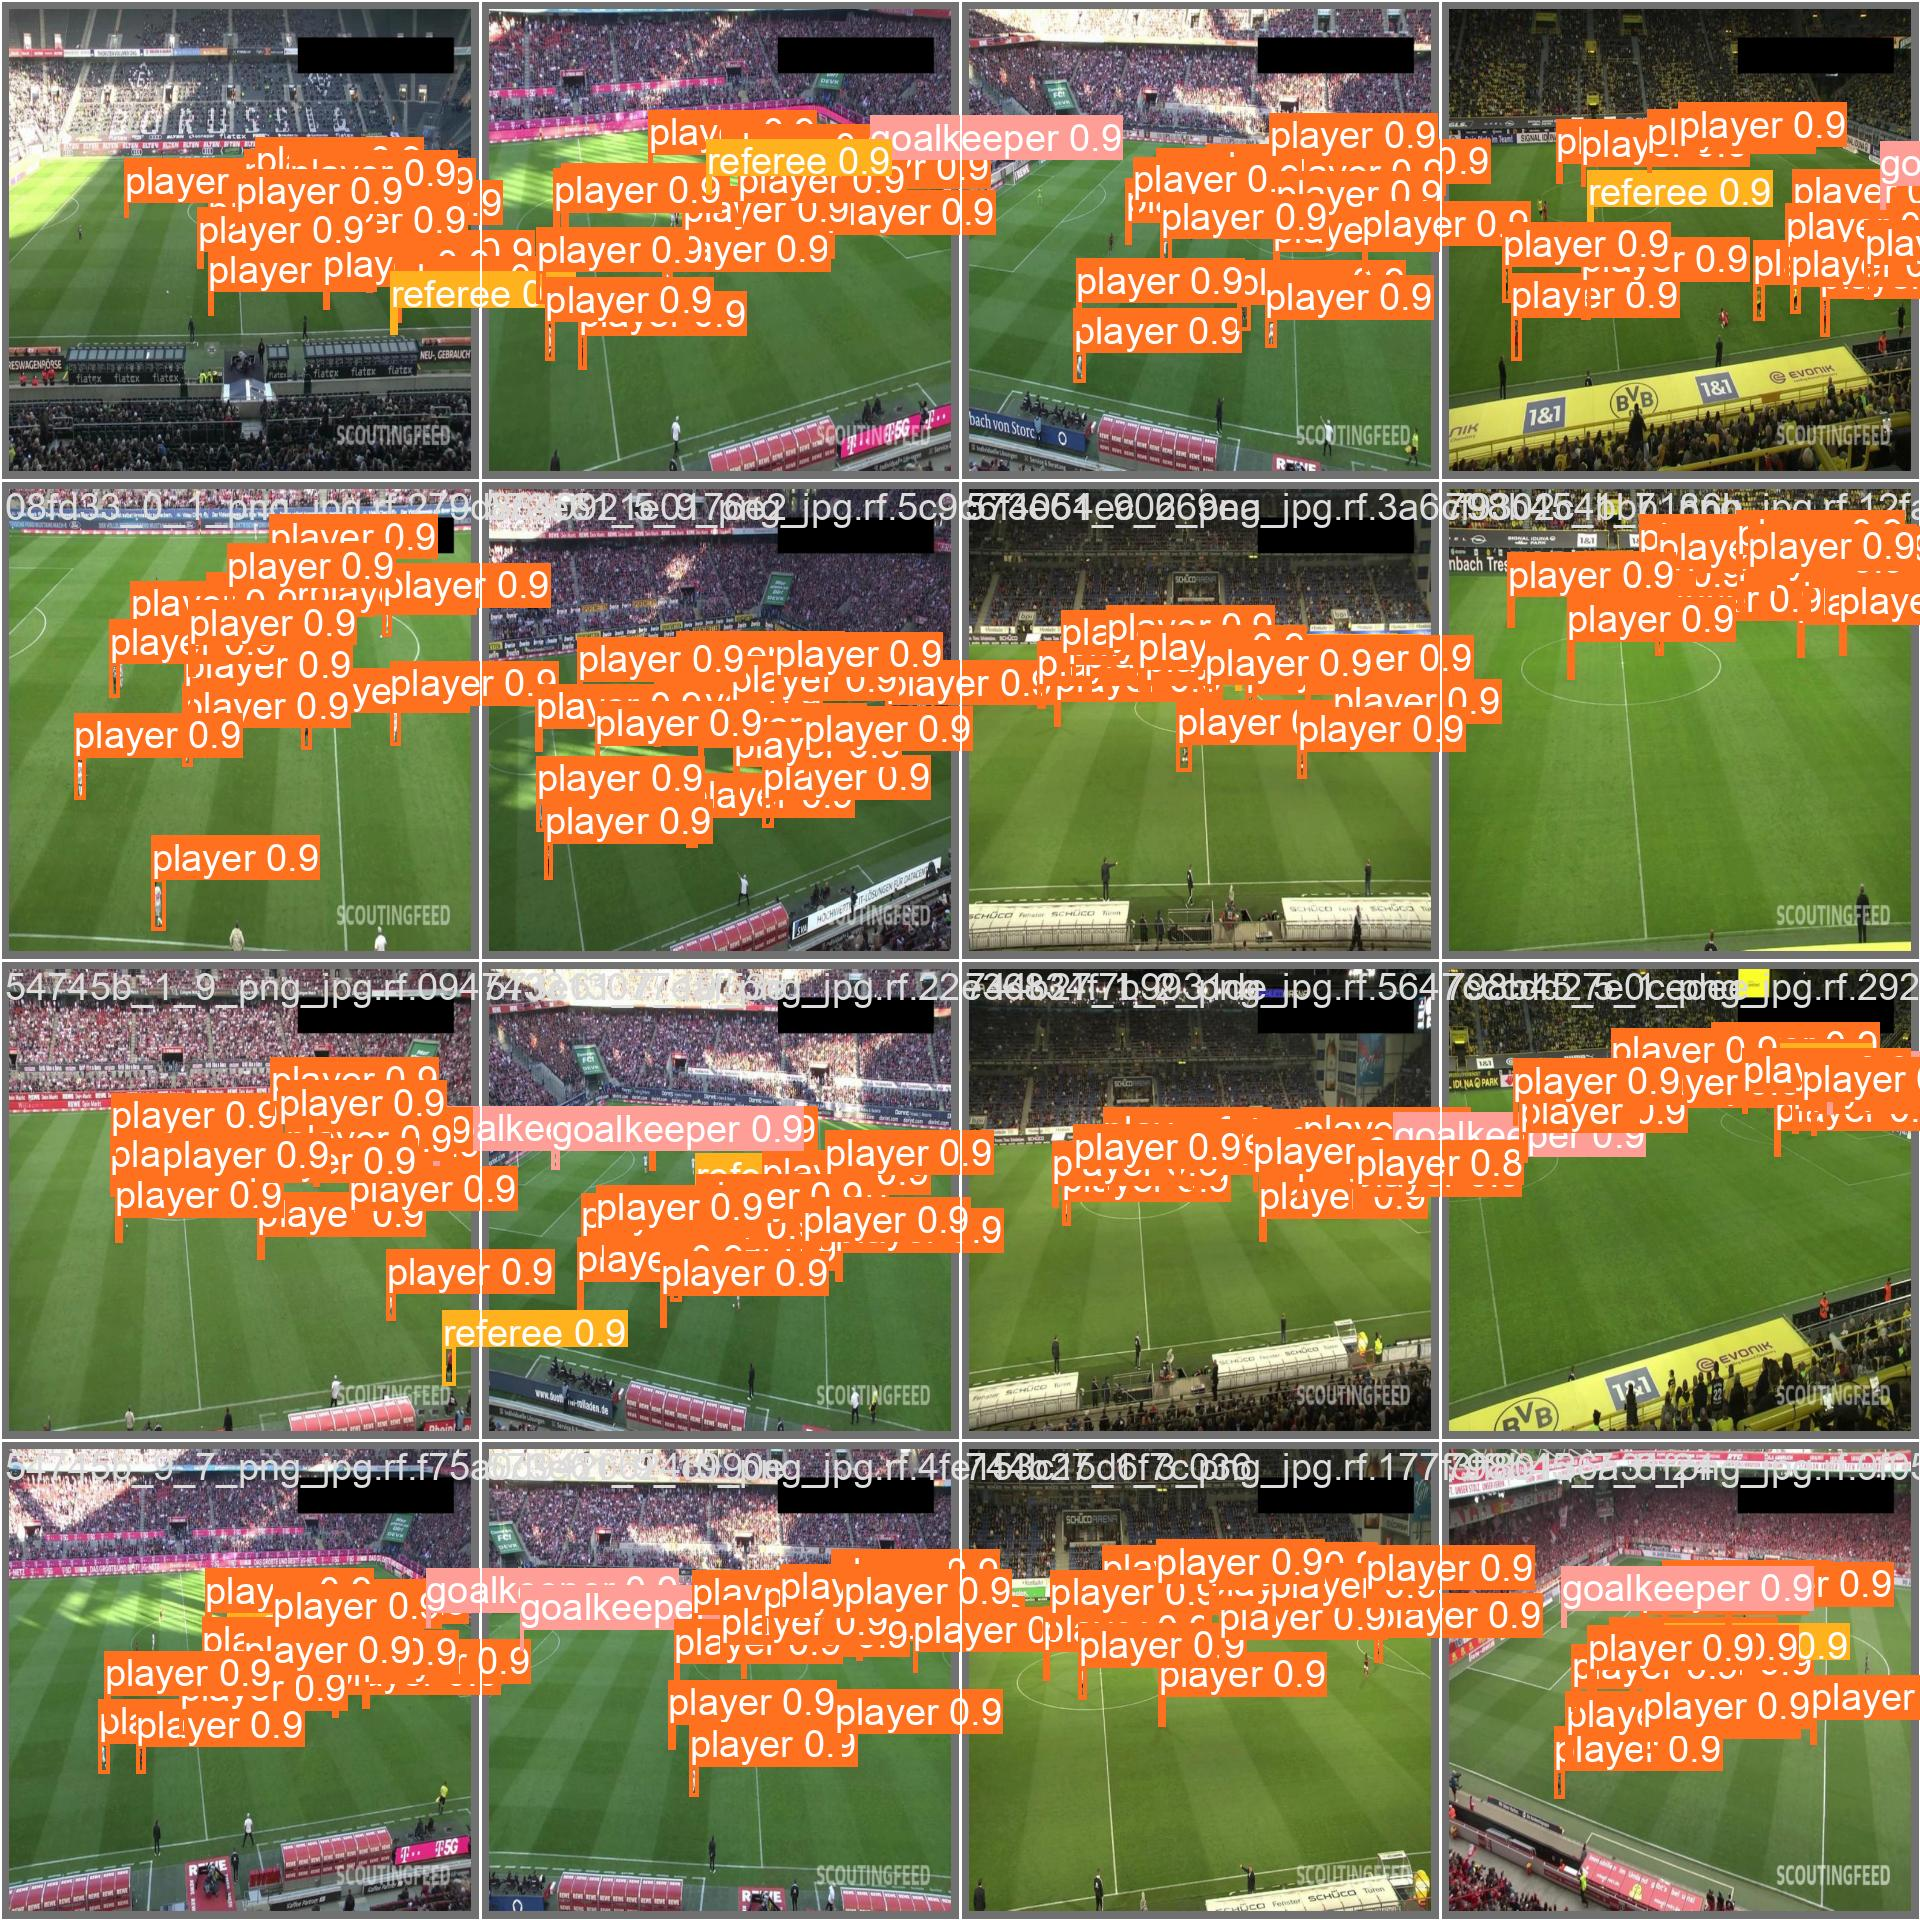

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [22]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/home/hy/Jacky/yolo-v8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-1.12.0+cu102 CUDA:0 (GeForce GTX 1080 Ti, 11178MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/hy/Jacky/yolo-v8/datasets/Football-Players-Detection-2-1/val
                 Class     Images  Instances      Box(P          R      mAP50  mWARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mWARNING ⚠️ NMS time limit 0.800s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         38        907      0.971      0.469      0.617      0.476
                  ball         38         32      0.998      0.312      0.463      0.258
            goalkeeper         38         27      0.949      0.481      0.615      0.474
                player         38        760       0.98      0.547      0.726      0.646
               referee         38   

## Inference with Custom Model

In [18]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/home/hy/Jacky/yolo-v8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-1.12.0+cu102 CUDA:0 (GeForce GTX 1080 Ti, 11178MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/26 /home/hy/Jacky/yolo-v8/datasets/Football-Players-Detection-2-1/test/images/08fd33_6_2_png_jpg.rf.47b06c2b93f4e5702602e80da431c407.jpg: 800x800 20 players, 2 referees, 9.7ms
image 2/26 /home/hy/Jacky/yolo-v8/datasets/Football-Players-Detection-2-1/test/images/08fd33_9_9_png_jpg.rf.65bcfeba52990607531810b1bdbec2f4.jpg: 800x800 1 ball, 20 players, 3 referees, 9.7ms
image 3/26 /home/hy/Jacky/yolo-v8/datasets/Football-Players-Detection-2-1/test/images/42ba34_1_2_png_jpg.rf.76fbbb97771b79e4396794e0c8df7b1a.jpg: 800x800 1 ball, 19 players, 3 referees, 9.6ms
image 4/26 /home/hy/Jacky/yolo-v8/datasets/Football-Players-Detection-2-1/test/images/42ba34_3_4_png_jpg.rf.860e66db043d3921bc153797fafe2685.jpg: 800x800 2 goalkeepers, 20 players, 3 referees, 9.7ms
image 5/26 /home/hy/Jacky/yolo-

**NOTE:** Let's take a look at few results.

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [19]:
dataset.version

'1'

In [20]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


# Inference with videos

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/home/hy/Jacky/yolo-v8/08fd33_4.mp4 save=true

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-1.12.0+cu102 CUDA:0 (GeForce GTX 1080 Ti, 11178MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/750) /home/hy/Jacky/yolo-v8/08fd33_4.mp4: 480x800 1 ball, 1 goalkeeper, 20 players, 1 referee, 10.7ms
video 1/1 (2/750) /home/hy/Jacky/yolo-v8/08fd33_4.mp4: 480x800 1 ball, 1 goalkeeper, 20 players, 1 referee, 6.9ms
video 1/1 (3/750) /home/hy/Jacky/yolo-v8/08fd33_4.mp4: 480x800 1 ball, 21 players, 1 referee, 7.0ms
video 1/1 (4/750) /home/hy/Jacky/yolo-v8/08fd33_4.mp4: 480x800 22 players, 1 referee, 7.0ms
video 1/1 (5/750) /home/hy/Jacky/yolo-v8/08fd33_4.mp4: 480x800 1 ball, 22 players, 1 referee, 6.9ms
video 1/1 (6/750) /home/hy/Jacky/yolo-v8/08fd33_4.mp4: 480x800 1 ball, 21 players, 1 referee, 6.9ms
video 1/1 (7/750) /home/hy/Jacky/yolo-v8/08fd33_4.mp4: 480x800 21 players, 2 referees, 6.9ms
video 1/1 (8/750) /home/hy/Jacky/yolo-v8/08fd33_4.mp4: 480x800 20 players, 2 referees, 6.9ms
video 1/1 (9/7

## Run inference on the model

In [23]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 54745b_9_2_png_jpg.rf.46636ed72f18668653a507afd4f72f39.jpg


{'predictions': [{'x': 449.5,
   'y': 361.5,
   'width': 17.0,
   'height': 57.0,
   'confidence': 0.9369841814041138,
   'class': 'player',
   'image_path': '/home/hy/Jacky/yolo-v8/datasets/Football-Players-Detection-2-1/test/images/54745b_9_2_png_jpg.rf.46636ed72f18668653a507afd4f72f39.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 252.0,
   'y': 324.0,
   'width': 20.0,
   'height': 54.0,
   'confidence': 0.9345762133598328,
   'class': 'player',
   'image_path': '/home/hy/Jacky/yolo-v8/datasets/Football-Players-Detection-2-1/test/images/54745b_9_2_png_jpg.rf.46636ed72f18668653a507afd4f72f39.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 219.0,
   'y': 280.5,
   'width': 20.0,
   'height': 51.0,
   'confidence': 0.9341142177581787,
   'class': 'player',
   'image_path': '/home/hy/Jacky/yolo-v8/datasets/Football-Players-Detection-2-1/test/images/54745b_9_2_png_jpg.rf.46636ed72f18668653a507afd4f72f39.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'